# Antenna Selection as an Optimization Problem

## One Antenna Selection Schemes

These schemes choose one antenna out of a total of $N_t$ available transmit antennas. 

#### Optimal Antenna Selection(OAS) Scheme

In this scheme it is assumed that the channel state information(CSI) is known for both the user(Adam) and the eavesdropper(Eve). It is also assumed that both use maximal ratio combining. The maximal achievable rate at Adam using antenna $i$ is given by

\begin{equation}
    R_i^A = \log_2\left(1 + \sum_{j=1}^{N_A}\frac{P|h_{ij}^{A}|}{\sigma_n^2}\right).
\end{equation}

Similarly the maximal achievable rate at Eve is given by 

\begin{equation}
    R_i^E = \log_2\left(1 + \sum_{j=1}^{N_E}\frac{P|h_{ij}^{E}|}{\sigma_n^2}\right).
\end{equation}

$N_A$ and $N_E$ indicate the number of receive antennas at Adam and Eve respectively. $h_{ij}^{A}$ is the channel coefficient from the $i$th transmit antenna to the $j$th receive antenna of Adam. The same convention is used for $h_{ij}^{E}$.

The optimal antenna for maximizing the secrecy capacity is the antenna that gives the largest difference in the channel capacity of Adam and Eve. Hence the optimal antenna selection criterion is given by

\begin{equation}
    b = \arg\max_{i\in\mathcal{S}}\left(R_i^A - R_i^E\right) = \arg\max_{i\in\mathcal{S}}\left(
    \frac{1 + \sum_{j=1}^{N_A}\frac{P|h_{ij}^{A}|}{\sigma_n^2}}{1 + \sum_{j=1}^{N_E}\frac{P|h_{ij}^{E}|}{\sigma_n^2}}
    \right),
\end{equation}

where $b$ denotes the best antenna and $\mathcal{S}$ is the set of the N transmit antennas. 

P is known at the source and also the noise variance can be assumed to be equal. This can be supported by noting that thermal noise variance is given by $\sigma^2_n = 4kTB$. Therefore by knowing the channel coefficients of the two channels the best antenna can be determined at the source. 

#### Sub Optimal Antenna Selection(SAS) scheme

In the case that the the channel of Eve is not known then the OAS scheme cannot work. The best antenna in this case is the one that maximizes the channel capacity of Adam, hoping that this will also maximize the secrecy capacity. 

Therefore the antenna selection can be done using

\begin{equation}
    b = \arg\max_{i\in\mathcal{S}}\left(R_i^A\right) = \arg\max_{i\in\mathcal{S}}\left(\sum_{j=1}^{N_A}\left| h_{ij}^{A} \right| \right)
\end{equation}

#### Multiple Transmit Antenna Selection for Linear Receivers

Instead of choosing only the best antenna this scheme chooses the subset of transmit antennas that give the best BER. This is done by maximizing the smallest singular value of the reduced channel matrix.

\begin{equation}
    S_o = \max_{s\in\mathcal{P}(\mathcal{S})} SV_{min} \left( H_s \right)
\end{equation}

$S_o$ is the set of antennae that maximizes the smallest singular value of the reduced channel matrix. $\mathcal{P}(\mathcal{S})$ is the power set of the antennae set, $\mathcal{S}$. $H_s$ is the effective channel matrix when transmitting from the antennae in $s$. $SV_{min}$ denotes the smallest singular value of the matrix. 

# Results

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize']=18
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['legend.fontsize']=18
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes.labelsize'] = 22

In [2]:
import numpy as np
import pickle

from DDAS import MakeReal
from AntennaSelection import generateLROASdata, generateOASdata, generateSASdata, calculateBERwithAS
from symbols import SymbolGenerator, MLdecoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.base import clone

In [3]:
data_prep_pipeline = Pipeline([
    ('toReal', MakeReal(RealPart = False, ImaginaryPart=False, magnitude = True, Phase = False)),
    ('stdScaler', StandardScaler()),
])

In [4]:
Nt = 2
Nr = 10

# N = 100000

# X_oas, y_oas= generateOASdata(N, nt = Nt, nr = Nr)
# X_sas, y_sas = generateSASdata(N, nt = Nt, nr = Nr)
# X_lroas, y_lroas = generateLROASdata(N, nt = Nt, nr = Nr)

# outfile = open('./train_data/x_oasNt2Nr10','wb')
# pickle.dump(X_oas, outfile)
# outfile.close()

# outfile = open('./train_data/y_oasNt2Nr10','wb')
# pickle.dump(y_oas, outfile)
# outfile.close()

# outfile = open('./train_data/X_sasNt2Nr10','wb')
# pickle.dump(X_sas, outfile)
# outfile.close()

# outfile = open('./train_data/y_sasNt2Nr10','wb')
# pickle.dump(y_sas, outfile)
# outfile.close()

# outfile = open('./train_data/X_lroasNt2Nr10','wb')
# pickle.dump(X_lroas, outfile)
# outfile.close()

# outfile = open('./train_data/y_lroasNt2Nr10','wb')
# pickle.dump(y_lroas, outfile)
# outfile.close()

In [5]:
X_oas_test, y_oas_test = generateOASdata(1000,nt = Nt, nr =Nr)
X_sas_test, y_sas_test = generateSASdata(1000,nt = Nt, nr =Nr)
X_lroas_test, y_lroas_test = generateLROASdata(1000,nt = Nt, nr =Nr)


infile = open('./train_data/x_oasNt2Nr10','rb')
X_oas = pickle.load(infile)
infile.close()

infile = open('./train_data/y_oasNt2Nr10','rb')
y_oas = pickle.load(infile)
infile.close()

infile = open('./train_data/X_sasNt2Nr10','rb')
X_sas = pickle.load(infile)
infile.close()

infile = open('./train_data/y_sasNt2Nr10','rb')
y_sas = pickle.load(infile)
infile.close()

infile = open('./train_data/X_lroasNt2Nr10','rb')
X_lroas = pickle.load(infile)
infile.close()

infile = open('./train_data/y_lroasNt2Nr10','rb')
y_lroas = pickle.load(infile)
infile.close()


pl_oas = clone(data_prep_pipeline)
pl_sas = clone(data_prep_pipeline)
pl_lroas = clone(data_prep_pipeline)

X_oas = pl_oas.fit_transform(X_oas)
X_oas_test = pl_oas.transform(X_oas_test)

outfile = open('./models/pl_oas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(pl_oas,outfile)
outfile.close()

X_sas = pl_sas.fit_transform(X_sas)
X_sas_test = pl_sas.transform(X_sas_test)

outfile = open('./models/pl_sas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(pl_sas,outfile)
outfile.close()

X_lroas = pl_lroas.fit_transform(X_lroas)
X_lroas_test = pl_lroas.transform(X_lroas_test)


outfile = open('./models/pl_lroas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(pl_lroas,outfile)
outfile.close()

## Model Accuracy

Machine learning algorithms work only with real data and perform better when the data has been normalized. Different possibilities exist on how to prepare the channel matrix for ML algorithms. 

The matrix can be vectorized, and then expanded so that each complex element corresponds to two elements in the new vector. One element will be the real part and the second the imaginary part. Another approach will be to make one element equal to the magnitude of the Channel matrix element and the other the phase of the complex number(the one used in the paper)

Another approach would be to decompose each channel element into the four numbers discussed above: real and imaginary part, magnitude and phase. 

However by looking at the equations above only the magnitude of the channel coefficients influences the decision. It is thus expected that the best approach would be to use only the magnitudes of the channel coefficients. 

This was indeed the case. Different variations of the methods discussed above were tested and the best results were from using the magnitudes only. In this respect the information needed to train the machine learning algorithms is half of the information needed to characterize the channel. This speeds up the learning time and also decreases the memory requirements for storing the training data. 

In [6]:
mlpc_oas = MLPClassifier(max_iter=1000)
svc_oas = SVC()
knn_oas = KNeighborsClassifier(n_neighbors=201)

mlpc_sas = MLPClassifier(max_iter=1000)
svc_sas = SVC()
knn_sas = KNeighborsClassifier(n_neighbors=201)

mlpc_lroas = MLPClassifier(max_iter=1000)
svc_lroas = SVC()
knn_lroas = KNeighborsClassifier(n_neighbors=201)

print('Classifiers for OAS')
mlpc_oas.fit(X_oas, y_oas)
print('MLP Classifier score:',mlpc_oas.score(X_oas_test, y_oas_test))
svc_oas.fit(X_oas,y_oas)
print('SVM score:',svc_oas.score(X_oas_test, y_oas_test))
knn_oas.fit(X_oas,y_oas)
print('KNN score:',knn_oas.score(X_oas_test, y_oas_test))

print('Classifiers for SAS')
mlpc_sas.fit(X_sas, y_sas)
print('MLP Classifier score:',mlpc_sas.score(X_sas_test, y_sas_test))
svc_sas.fit(X_sas,y_sas)
print('SVM score:',svc_sas.score(X_sas_test, y_sas_test))
knn_sas.fit(X_sas,y_sas)
print('KNN score:',knn_sas.score(X_sas_test, y_sas_test))

print('Classifiers for LROAS')
mlpc_lroas.fit(X_lroas, y_lroas)
print('MLP Classifier score:',mlpc_lroas.score(X_lroas_test, y_lroas_test))
#svc_lroas.fit(X_lroas,y_lroas)
# print('SVM score:',svc_lroas.score(X_lroas_test, y_lroas_test))
knn_lroas.fit(X_lroas,y_lroas)
print('KNN score:',knn_sas.score(X_sas_test, y_sas_test))

Classifiers for OAS
MLP Classifier score: 0.967
SVM score: 0.975
KNN score: 0.922
Classifiers for SAS
MLP Classifier score: 0.982
SVM score: 0.989
KNN score: 0.97
Classifiers for LROAS
MLP Classifier score: 0.986
KNN score: 0.97


In [7]:
outfile = open('./models/mlpc_oas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(mlpc_oas,outfile)
outfile.close()

outfile = open('./models/mlpc_sas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(mlpc_sas,outfile)
outfile.close()

outfile = open('./models/mlpc_lroas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(mlpc_lroas,outfile)
outfile.close()

outfile = open('./models/knn_oas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(knn_oas,outfile)
outfile.close()

outfile = open('./models/knn_sas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(knn_sas,outfile)
outfile.close()

outfile = open('./models/knn_lroas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(knn_lroas,outfile)
outfile.close()

outfile = open('./models/svm_oas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(svc_oas,outfile)
outfile.close()

outfile = open('./models/svm_sas_Nt{}Nr{}'.format(Nt,Nr), 'wb')
pickle.dump(svc_sas,outfile)
outfile.close()

In [8]:
infile = open('./analytic_results/ber_snr','rb')
snr = pickle.load(infile)
infile.close()

infile = open('./analytic_results/ber_all','rb')
BER_all = pickle.load(infile)
infile.close()

infile = open('./analytic_results/ber_oas','rb')
BER_oas = pickle.load(infile)
infile.close()

infile = open('./analytic_results/ber_sas','rb')
BER_sas = pickle.load(infile)
infile.close()

infile = open('./analytic_results/ber_lroas','rb')
BER_lroas = pickle.load(infile)
infile.close()

infile = open('./analytic_results/ber_random_single','rb')
BER_random_single = pickle.load(infile)
infile.close()

infile = open('./analytic_results/ber_random_subset','rb')
BER_random_subset = pickle.load(infile)
infile.close()

infile = open('./analytic_results/ber_MaxMinNorm','rb')
BER_MaxMinNorm = pickle.load(infile)
infile.close()

## Analytic Techniques

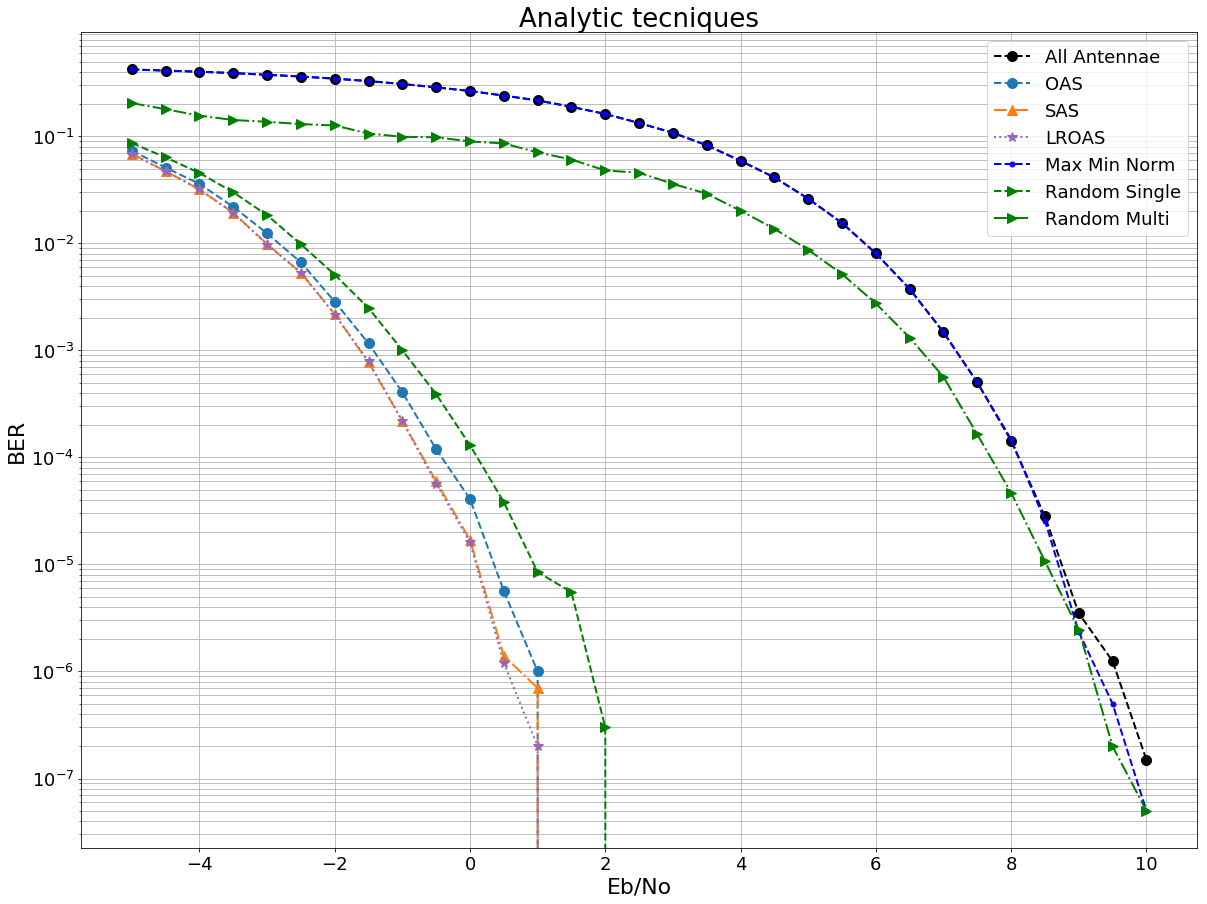

In [9]:
plt.figure(figsize=(20,15))
plt.semilogy(snr, BER_all, 'o--', color = 'k', label='All Antennae')
BER_oas[snr==2] = 0
plt.semilogy(snr, BER_oas, 'o--', color = 'C0', label='OAS')
plt.semilogy(snr, BER_sas, '^-.', color = 'C1', label='SAS')
plt.semilogy(snr, BER_lroas, '*:', color = 'C4', label='LROAS')

plt.semilogy(snr, BER_MaxMinNorm, 'b.--', label='Max Min Norm')

plt.semilogy(snr, BER_random_single, '>--', color = 'g', label='Random Single')
plt.semilogy(snr, BER_random_subset, '>-.', color = 'g', label='Random Multi')

plt.title('Analytic tecniques')
plt.legend()
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.xlabel('Eb/No')
plt.ylabel('BER')
plt.show()

In [12]:
infile = open('./model_results/ber_oas_mlpc_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_mlpc_oas = pickle.load(infile)
infile.close()

infile = open('./model_results/ber_sas_mlpc_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_mlpc_sas = pickle.load(infile)
infile.close()

infile = open('./model_results/ber_lroas_mlpc_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_mlpc_lroas = pickle.load(infile)
infile.close()

infile = open('./model_results/ber_oas_knn_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_knn_oas = pickle.load(infile)
infile.close()

infile = open('./model_results/ber_sas_knn_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_knn_sas = pickle.load(infile)
infile.close()

infile = open('./model_results/ber_lroas_knn_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_knn_lroas = pickle.load(infile)
infile.close()

infile = open('./model_results/ber_oas_svm_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_svm_oas = pickle.load(infile)
infile.close()

infile = open('./model_results/ber_sas_svm_Nt{}Nr{}'.format(Nt,Nr), 'rb')
BER_svm_sas = pickle.load(infile)
infile.close()

## Optimal Antenna Selection Comparison

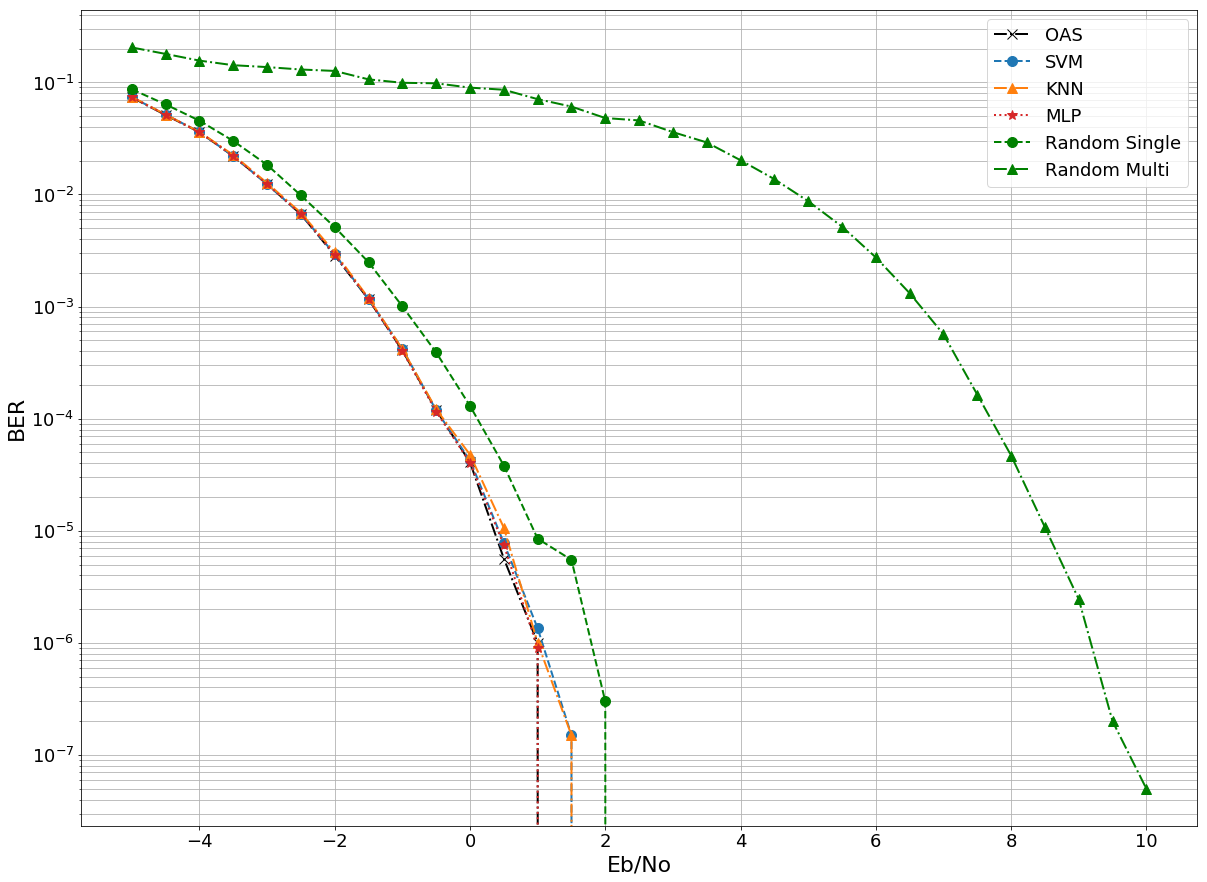

In [13]:
plt.figure(figsize=(20,15))
# plt.semilogy(snr, BER_all, 'o--', color = 'k', label='All Antennae')

plt.semilogy(snr, BER_oas, 'xk-.', label="OAS")

plt.semilogy(snr, BER_svm_oas, 'o--', color = 'C0', label='SVM')
plt.semilogy(snr, BER_knn_oas, '^-.', color = 'C1', label='KNN')
plt.semilogy(snr, BER_mlpc_oas, '*:', color = 'C3', label='MLP')


plt.semilogy(snr, BER_random_single, 'o--', color = 'g', label='Random Single')
plt.semilogy(snr, BER_random_subset, '^-.', color = 'g', label='Random Multi')

# plt.title('OAS')
plt.legend()
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.xlabel('Eb/No')
plt.ylabel('BER')
plt.show()

##  Suboptimal Antenna Selection Comparison

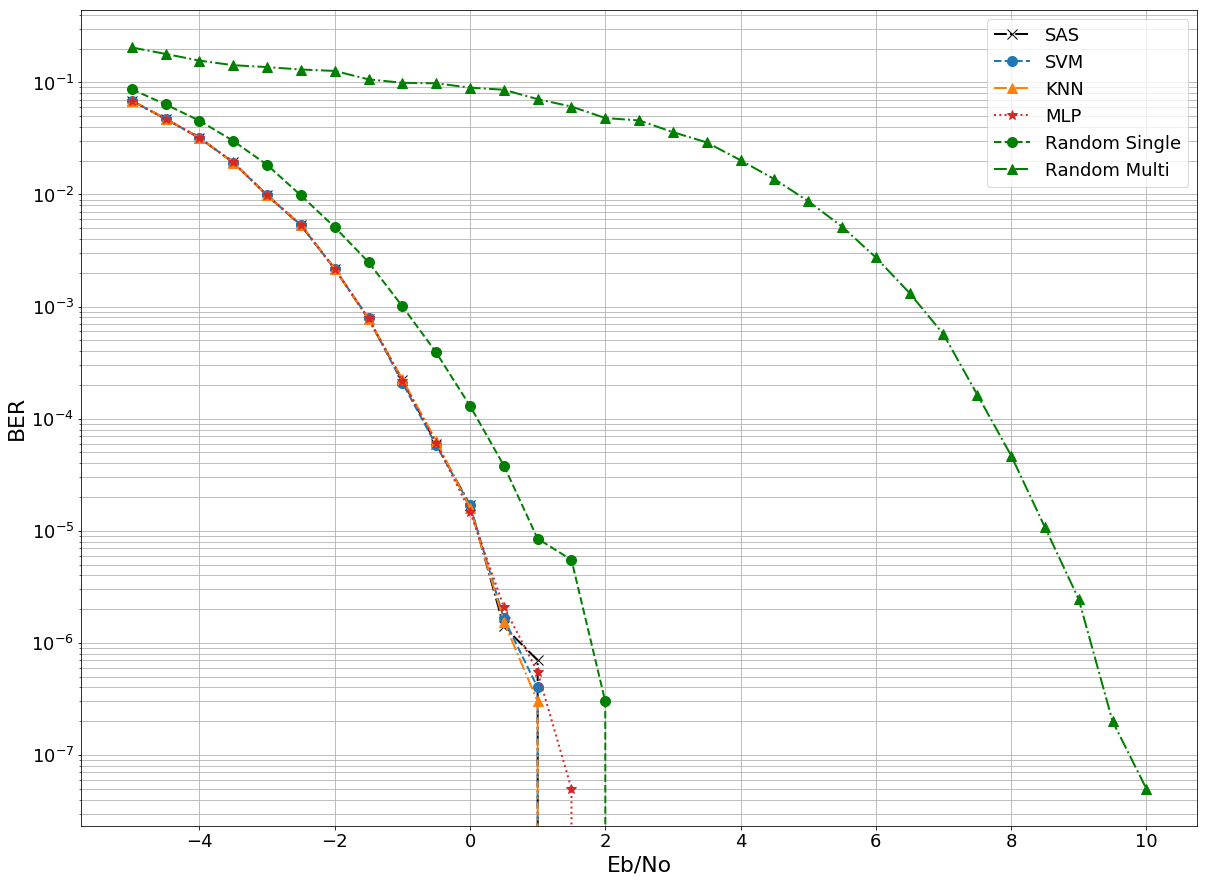

In [14]:
plt.figure(figsize=(20,15))
# plt.semilogy(snr, BER_all, 'o--', color = 'k', label='All Antennae')

plt.semilogy(snr, BER_sas, 'xk-.', label="SAS")

plt.semilogy(snr, BER_svm_sas, 'o--', color = 'C0', label='SVM')
plt.semilogy(snr, BER_knn_sas, '^-.', color = 'C1', label='KNN')
plt.semilogy(snr, BER_mlpc_sas, '*:', color = 'C3', label='MLP')


plt.semilogy(snr, BER_random_single, 'o--', color = 'g', label='Random Single')
plt.semilogy(snr, BER_random_subset, '^-.', color = 'g', label='Random Multi')

# plt.title('OAS')
plt.legend()
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.xlabel('Eb/No')
plt.ylabel('BER')

plt.show()

## Linear Receiver Optimal Antenna Selection Comparison

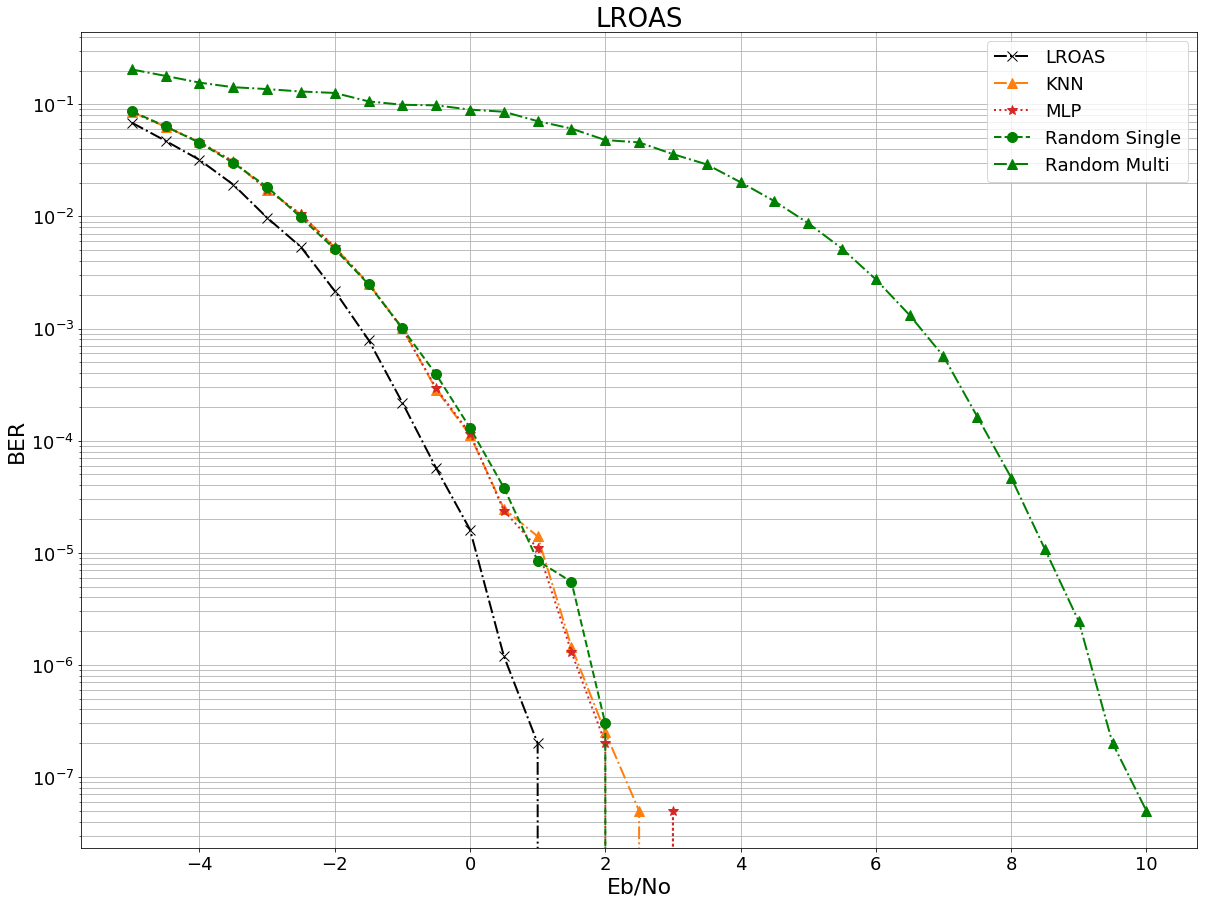

In [16]:
plt.figure(figsize=(20,15))
# plt.semilogy(snr, BER_all, 'o--', color = 'k', label='All Antennae')

plt.semilogy(snr, BER_lroas, 'xk-.', label="LROAS")

plt.semilogy(snr, BER_knn_lroas, '^-.', color = 'C1', label='KNN')
plt.semilogy(snr, BER_mlpc_lroas, '*:', color = 'C3', label='MLP')


plt.semilogy(snr, BER_random_single, 'o--', color = 'g', label='Random Single')
plt.semilogy(snr, BER_random_subset, '^-.', color = 'g', label='Random Multi')

plt.title('LROAS')
plt.legend()
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.xlabel('Eb/No')
plt.ylabel('BER')
plt.show()